### Duck typing (via SimpleNamespace)

In [22]:
from hagis import Layer

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0")

for city in layer.query(record_count=5):
    print(city)


namespace(objectid=1, areaname='Ewa Beach', class='CDP', st='HI', capital='N', pop2000=14650, geometry=namespace(x=-158.00897733999997, y=21.31569802000007, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=2, areaname='Halawa', class='CDP', st='HI', capital='N', pop2000=13891, geometry=namespace(x=-157.92001385499998, y=21.374466437000024, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=3, areaname='Hilo', class='CDP', st='HI', capital='N', pop2000=40759, geometry=namespace(x=-155.08314862399996, y=19.702481852000062, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=4, areaname='Honolulu', class='CDP', st='HI', capital='Y', pop2000=371657, geometry=namespace(x=-157.82343915499996, y=21.305785065000066, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=5, areaname='Kahului', class='CDP', st='HI', capital='N', pop2000=20146, geometry=namespace(x=-156.46462546799998, y=20.878548180000053, spati

### Where clause and WKID

In [23]:
from hagis import Layer

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0")

for city in layer.query("pop2000 > 1000000", wkid=3857):
    print(city.areaname, city.geometry)


Phoenix namespace(x=-12476276.642097982, y=3965648.0787066477, spatialReference={'wkid': 102100, 'latestWkid': 3857})
Los Angeles namespace(x=-13177554.26025346, y=4040376.9659394654, spatialReference={'wkid': 102100, 'latestWkid': 3857})
San Diego namespace(x=-13040671.36805095, y=3866078.150301196, spatialReference={'wkid': 102100, 'latestWkid': 3857})
Chicago namespace(x=-9760422.274562363, y=5137143.132805097, spatialReference={'wkid': 102100, 'latestWkid': 3857})
New York namespace(x=-8228506.005934231, y=4968813.6412190115, spatialReference={'wkid': 102100, 'latestWkid': 3857})
Philadelphia namespace(x=-8365080.101208865, y=4865653.375238131, spatialReference={'wkid': 102100, 'latestWkid': 3857})
Dallas namespace(x=-10774298.044017512, y=3868724.7951710317, spatialReference={'wkid': 102100, 'latestWkid': 3857})
Houston namespace(x=-10618006.258402834, y=3473108.472451801, spatialReference={'wkid': 102100, 'latestWkid': 3857})
San Antonio namespace(x=-10966381.597921556, y=3433242

### Other keyword arguments

In [24]:
from hagis import Layer

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0")

for city in layer.query("pop2000 > 1000000", orderByFields="pop2000 DESC"):
    print(city.areaname, city.pop2000)


New York 8008278
Los Angeles 3694820
Chicago 2896016
Houston 1953631
Philadelphia 1517550
Phoenix 1321045
San Diego 1223400
Dallas 1188580
San Antonio 1144646


### Static typing

In [25]:
from hagis import Layer, Point

class City:
    objectid: int
    areaname: str
    pop2000: int
    geometry: Point

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0", City)

for city in layer.query("pop2000 > 1000000"):
    print(city.areaname, city.pop2000, city.geometry.x, city.geometry.y)


Phoenix 1321045 -112.07629996499998 33.528369929000064
Los Angeles 3694820 -118.37598399299998 34.08615911600003
San Diego 1223400 -117.14634405099997 32.77954103900004
Chicago 2896016 -87.67936508699995 41.84067502400006
New York 8008278 -73.91792710599998 40.704233989000045
Philadelphia 1517550 -75.14479307799996 39.99801187800006
Dallas 1188580 -96.78716608599996 32.799528043000066
Houston 1953631 -95.38317308799998 29.762895012000058
San Antonio 1144646 -98.51268200899995 29.451532072000077


### Lambda filter (limited support)

In [26]:
from hagis import Layer

class City:
    objectid: int
    areaname: str
    pop2000: int

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0", City)

for city in layer.query(lambda x: x.pop2000 > 200000 and x.areaname.startswith("A")):
    print(city.areaname, city.pop2000)


Anaheim 328014
Aurora 276393
Atlanta 416474
Albuquerque 448607
Akron 217074
Arlington 332969
Austin 656562
Anchorage 260283


### Data frame

In [27]:
from hagis import Layer
import pandas as pd

class City:
    objectid: int
    areaname: str
    pop2000: int

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/0", City)

pd.DataFrame.from_records(city.__dict__ for city in layer.query(
    lambda x: x.pop2000 > 1000000,
    record_count=5,
    orderByFields="pop2000 DESC"))


,objectid,areaname,pop2000
0,2456,New York,8008278
1,376,Los Angeles,3694820
2,1137,Chicago,2896016
3,3114,Houston,1953631
4,2867,Philadelphia,1517550


### Mapping to a dataclass

In [28]:
from hagis import Layer, Polyline
from dataclasses import dataclass

@dataclass(frozen=True)
class Highway:
    objectid: int
    route: str
    shape: Polyline

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/1", Highway)

for highway in layer.query(record_count=5):
    print(highway.route)


Interstate  82
Interstate (OR/ID/UT)  84
Interstate  94
Interstate  94
Interstate  35


### Mapping to a NamedTuple

In [29]:
from hagis import Layer, Polyline
from typing import NamedTuple

class Highway(NamedTuple):
    objectid: int
    route: str
    geometry: Polyline

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/1", Highway)

for highway in layer.query(record_count=5):
    print(highway.route)


Interstate  82
Interstate (OR/ID/UT)  84
Interstate  94
Interstate  94
Interstate  35


### Mapping to Shapely geometry

New York 18976457 POINT (-75.51225743376675 42.94666085682526)


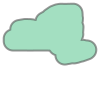

California 33871648 POINT (-119.6011471163841 37.24174110039247)


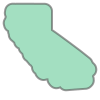

Texas 20851820 POINT (-99.352096360887 31.491160348955933)


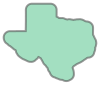

Florida 15982378 POINT (-82.49557418234569 28.658676471012576)


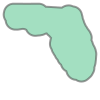

In [30]:
from hagis import Layer
from shapely import MultiPolygon

class State:
    state_name: str
    pop2000: int
    geometry: MultiPolygon

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/2", State)

for state in layer.query(lambda x: x.pop2000 > 15000000):
    print(state.state_name, state.pop2000, state.geometry.centroid)
    display(state.geometry.buffer(1))


### GeoPandas

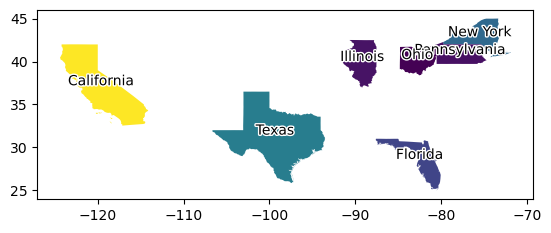

In [31]:
from hagis import Layer
from geopandas import GeoDataFrame
from matplotlib import patheffects
from shapely.geometry import MultiPolygon

class State:
    state_name: str
    pop2000: int
    geometry: MultiPolygon

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/2", State)
states = list(layer.query(lambda x: x.pop2000 > 10000000))

gdf = GeoDataFrame(map(vars, states))
plot = gdf.plot(column="pop2000")

for state in states:
    plot.annotate(state.state_name, state.geometry.centroid.coords[0], ha="center",
                  path_effects=[patheffects.withStroke(linewidth=2, foreground="white")])


### Mapping to Esri geometry

New York 18976457 (-75.51225743376672, 42.94666085682523)


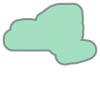

California 33871648 (-119.60114711638413, 37.241741100392474)


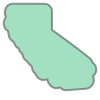

Texas 20851820 (-99.35209636088696, 31.491160348955905)


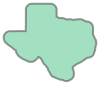

Florida 15982378 (-82.4955741823458, 28.658676471012605)


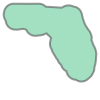

In [32]:
from hagis import Layer
from arcgis.geometry import Polygon

class State:
    state_name: str
    pop2000: int
    geometry: Polygon

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/2", State)

for state in layer.query(lambda x: x.pop2000 > 15000000):
    print(state.state_name, state.pop2000, state.geometry.centroid)
    display(state.geometry.buffer(1))


### Custom property to field mapping

In [33]:
from hagis import Layer, Polyline

class Highway:
    objectid: int
    name: str  # This is actually called "route" in the table.
    geometry: Polyline

custom_mapping = {
    "name": "route",
    "type": "type" # This is not even defined in the Highway class (i.e. customer-specific field).
}

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/USA/MapServer/1", Highway, **custom_mapping)

for highway in layer.query(record_count=5):
    print(highway.name, getattr(highway, "type")) # Can be accessed like highway.type (though it doesn't make sense to do so).


Interstate  82 Multi-Lane Divided
Interstate (OR/ID/UT)  84 Multi-Lane Divided
Interstate  94 Multi-Lane Divided
Interstate  94 Multi-Lane Divided
Interstate  35 Multi-Lane Divided


### Coded value domain

In [34]:
from enum import Enum
from typing import Optional
from uuid import UUID
from hagis import Layer, Point

class Factype(Enum):
    Public_Safety_Resource = 1
    Pet_Collection_Shelter = 2
    Shelter = 3

class Opsstatus(Enum):
    Open = "Open"
    Closed = "Closed"
    Unknown = "Unknown"

class Facility:
    objectid: int
    facilityid: Optional[str]
    factype: Optional[Factype]
    opsstatus: Optional[Opsstatus]
    globalid: UUID
    geometry: Point

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/EmergencyFacilities/FeatureServer/0", Facility)

for facility in layer.query():
    if facility.factype == Factype.Public_Safety_Resource:
        print(facility.__dict__)


{'objectid': 82677, 'facilityid': 'J4050', 'factype': <Factype.Public_Safety_Resource: 1>, 'opsstatus': <Opsstatus.Open: 'Open'>, 'globalid': UUID('e20397ed-76ff-4bf5-90a2-012e06dfc958'), 'geometry': <hagis.Point object at 0x00000176929CBD90>}
{'objectid': 82688, 'facilityid': 'C0372', 'factype': <Factype.Public_Safety_Resource: 1>, 'opsstatus': <Opsstatus.Open: 'Open'>, 'globalid': UUID('024f7a69-da80-46bb-9300-72197244193b'), 'geometry': <hagis.Point object at 0x000001768EFBC280>}
{'objectid': 82682, 'facilityid': 'F0234', 'factype': <Factype.Public_Safety_Resource: 1>, 'opsstatus': <Opsstatus.Open: 'Open'>, 'globalid': UUID('01e884d3-fd47-4893-8997-7eabf8e624e0'), 'geometry': <hagis.Point object at 0x000001768EFBC0D0>}
{'objectid': 82675, 'facilityid': 'G2042', 'factype': <Factype.Public_Safety_Resource: 1>, 'opsstatus': <Opsstatus.Closed: 'Closed'>, 'globalid': UUID('366b2e0d-8326-4ba6-9b33-66b12da86fc4'), 'geometry': <hagis.Point object at 0x000001768EFBC280>}
{'objectid': 82680, 

### Coded value domain (with data issues)

In [35]:
from enum import Enum
from typing import Union
from hagis import Layer, Point

class Opsstatus(Enum):
    Open = "Open"
    Closed = "Closed"
    Unknown = "Unknown"

class Facility:
    objectid: int
    opsstatus: Union[Opsstatus, str, None]
    geometry: Point

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/EmergencyFacilities/FeatureServer/0", Facility)

for facility in layer.query():
    if facility.opsstatus is None:
        print("<null>")
    elif isinstance(facility.opsstatus, Opsstatus):
        print(facility.opsstatus.name)
    else:
        print(f"'{facility.opsstatus}' is not a valid status!")


Open
Open
Closed
Open
Open
Closed
Open
Open
Closed
Closed
Open
Open
Closed
<null>
<null>
Open


### Parallel download (and yield) >100K records

In [36]:
from datetime import datetime
from typing import List
from hagis import Layer

class Rain:
    objectid: int
    site_no: str
    date_time: datetime
    rainfall_inch: float

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/SpatioTemporalAggregation/RainfallTimeSeriesDataIllinois/MapServer/7", Rain)

print(f"This layer has {layer.count()} records.")

records: List[Rain] = []

# Keep querying.
for rain in layer.query(record_count=123456):
    records.append(rain)

print(f"{len(records)} records downloaded.")


This layer has 572416 records.
123456 records downloaded.


### Insert

In [37]:
from hagis import Layer, Point

class Ambulance:
    objectid: int
    unitname: str
    type: int
    speed: float
    geometry: Point

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/RedlandsEmergencyVehicles/FeatureServer/0", Ambulance)

ambulance = Ambulance()
ambulance.unitname = "Created by https://pypi.org/project/hagis/"
ambulance.type = 1
ambulance.speed = 12.34567
ambulance.geometry = Point()
ambulance.geometry.x, ambulance.geometry.y = -120, 50

# Returns the newly created object ids.
oid = layer.insert([ambulance])[0]

layer.find(oid).__dict__


{'objectid': 431516,
 'unitname': 'Created by https://pypi.org/project/hagis/',
 'type': 1,
 'speed': 12.34567,
 'geometry': <hagis.Point at 0x176928319d0>}

### Update

In [38]:
from hagis import Layer

class Ambulance:
    objectid: int
    unitname: str

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/RedlandsEmergencyVehicles/FeatureServer/0", Ambulance)

where_clause = "unitname LIKE '%hagis%'"

# Update requires materializing records first.
ambulances = list(layer.query(where_clause))

for ambulance in ambulances:
    ambulance.unitname = "Updated by https://pypi.org/project/hagis/"

# Send the list back to the server.
layer.update(ambulances)

for ambulance in layer.query(where_clause):
    print(ambulance.__dict__)


{'objectid': 431516, 'unitname': 'Updated by https://pypi.org/project/hagis/'}


### Delete

In [39]:
from hagis import Layer

layer = Layer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/RedlandsEmergencyVehicles/FeatureServer/0")

where_clause = "unitname LIKE '%hagis%'"

print("Before", layer.count(where_clause))

# Delete requires the where clause.
layer.delete(where_clause)

print("After", layer.count(where_clause))


Before 1
After 0


### Generic operations

In [40]:

from dataclasses import dataclass
from datetime import datetime, timedelta
from typing import Iterator, Optional, Type, TypeVar
from hagis import Layer, Point, Polyline, Polygon

URL = "https://sampleserver6.arcgisonline.com/arcgis/rest/services/Wildfire/FeatureServer"

@dataclass(frozen=True)
class Tracked:
    objectid: int
    created_user: str
    created_date: datetime
    last_edited_user: Optional[str]
    last_edited_date: Optional[datetime]

@dataclass(frozen=True)
class ResponsePoint(Tracked):
    rotation: Optional[int]
    description: Optional[str]
    geometry: Point

@dataclass(frozen=True)
class ResponseLine(Tracked):
    symbolid: Optional[int]
    timestamp: Optional[datetime]
    description: Optional[str]
    shape__length: float
    geometry: Polyline

@dataclass(frozen=True)
class ResponsePolygon(Tracked):
    symbolid: Optional[int]
    description: Optional[str]
    shape__area: float
    geometry: Polygon

T = TypeVar("T", bound=Tracked)

def get_recent_responses(model: Type[T], layer_id: int, hours: int) -> Iterator[T]:
    layer = Layer(f"{URL}/{layer_id}", model)
    time = datetime.utcnow() + timedelta(hours=-hours)
    for response in layer.query(lambda x: x.last_edited_date is not None and x.last_edited_date > time):
        yield response

last_n_hours = 4

print(f"Response points edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponsePoint, 0, last_n_hours):
    print(r.last_edited_date, r.rotation)

print(f"Response lines edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponseLine, 1, last_n_hours):
    print(r.last_edited_date, r.timestamp)

print(f"Response polygons edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponsePolygon, 2, last_n_hours):
    print(r.last_edited_date, r.symbolid)


Response points edited in the last 4 hour(s)
2023-05-24 09:31:37 None
2023-05-24 09:31:44 None
Response lines edited in the last 4 hour(s)
Response polygons edited in the last 4 hour(s)
2023-05-24 08:52:03 0
2023-05-24 08:52:19 1
2023-05-24 08:55:56 None
2023-05-24 08:55:56 None
2023-05-24 09:37:56 None
2023-05-24 10:08:19 None
2023-05-24 11:31:36 None
2023-05-24 11:44:12 None


### Static duck type constraint

In [41]:
from dataclasses import dataclass
from datetime import datetime, timedelta
from typing import Iterator, Optional, Protocol, Type, TypeVar
from hagis import Layer, Point, Polyline, Polygon

URL = "https://sampleserver6.arcgisonline.com/arcgis/rest/services/Wildfire/FeatureServer"

class Tracked(Protocol):
    objectid: int
    created_user: str
    created_date: datetime
    last_edited_user: Optional[str]
    last_edited_date: Optional[datetime]

@dataclass(frozen=True)
class ResponsePoint:
    objectid: int
    created_user: str
    created_date: datetime
    last_edited_user: Optional[str]
    last_edited_date: Optional[datetime]
    rotation: Optional[int]
    description: Optional[str]
    geometry: Point

@dataclass(frozen=True)
class ResponseLine:
    objectid: int
    created_user: str
    created_date: datetime
    last_edited_user: Optional[str]
    last_edited_date: Optional[datetime]
    symbolid: Optional[int]
    timestamp: Optional[datetime]
    description: Optional[str]
    shape__length: float
    geometry: Polyline

@dataclass(frozen=True)
class ResponsePolygon:
    objectid: int
    created_user: str
    created_date: datetime
    last_edited_user: Optional[str]
    last_edited_date: Optional[datetime]
    symbolid: Optional[int]
    description: Optional[str]
    shape__area: float
    geometry: Polygon

T = TypeVar("T", bound=Tracked)

def get_recent_responses(model: Type[T], layer_id: int, hours: int) -> Iterator[T]:
    layer = Layer(f"{URL}/{layer_id}", model)
    time = datetime.utcnow() + timedelta(hours=-hours)
    for response in layer.query(lambda x: x.last_edited_date is not None and x.last_edited_date > time):
        yield response

last_n_hours = 4

print(f"Response points edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponsePoint, 0, last_n_hours):
    print(r.last_edited_date, r.rotation)

print(f"Response lines edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponseLine, 1, last_n_hours):
    print(r.last_edited_date, r.timestamp)

print(f"Response polygons edited in the last {last_n_hours} hour(s)")
for r in get_recent_responses(ResponsePolygon, 2, last_n_hours):
    print(r.last_edited_date, r.symbolid)


Response points edited in the last 4 hour(s)
2023-05-24 09:31:37 None
2023-05-24 09:31:44 None
Response lines edited in the last 4 hour(s)
Response polygons edited in the last 4 hour(s)
2023-05-24 08:52:03 0
2023-05-24 08:52:19 1
2023-05-24 08:55:56 None
2023-05-24 08:55:56 None
2023-05-24 09:37:56 None
2023-05-24 10:08:19 None
2023-05-24 11:31:36 None
2023-05-24 11:44:12 None


### Authentication token

In [42]:
from hagis import Layer
from getpass import getpass

layer = Layer("https://services8.arcgis.com/hlI3WvZMbprlF0sO/ArcGIS/rest/services/Redlands_65985/FeatureServer/0")

# Self-renewing token.
layer.set_token_generator("jshirota", getpass(), "https://myserver/mywebapp")

# Static token.
# layer.set_token("token123")

for ambulance in layer.query():
    print(ambulance)


namespace(objectid=1, unitname='Created by https://pypi.org/project/hagis/', status=0, type=1, callnumber=None, speed=12.34567, lastreport=None, globalid=UUID('b06cc2de-95ac-4265-9839-50fa0348cd09'), geometry=namespace(x=-120, y=50, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=2, unitname='Created by https://pypi.org/project/hagis/', status=0, type=1, callnumber=None, speed=12.34567, lastreport=None, globalid=UUID('ea501a6d-c2be-4d7c-babd-a740427ce9f0'), geometry=namespace(x=-120, y=50, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=3, unitname='Created by https://pypi.org/project/hagis/', status=0, type=1, callnumber=None, speed=12.34567, lastreport=None, globalid=UUID('2f0768bd-b1f9-4a6d-8fe6-53bf97713dff'), geometry=namespace(x=-120, y=50, spatialReference={'wkid': 4326, 'latestWkid': 4326}))
namespace(objectid=4, unitname='Created by https://pypi.org/project/hagis/', status=0, type=1, callnumber=None, speed=12.34567, lastreport=